# Trend Analysis & Profit Modeling.

This extends the existing retail sales analysis by:
- Examining sales and profit trends over time
- Identifying seasonal patterns
- Building a simple, interpretable profit prediction model

The objective is **not prediction accuracy**, but understanding **drivers, direction, and risk**.

In [1]:
# Importing Libraries & Loading Clean Data.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error


df = pd.read_csv("../data/processed/superstore_clean.csv")

df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [2]:
# Time Feature Engineering.

df["Order_Year"] = df["Order Date"].dt.year
df["Order_Month"] = df["Order Date"].dt.to_period("M").astype(str)


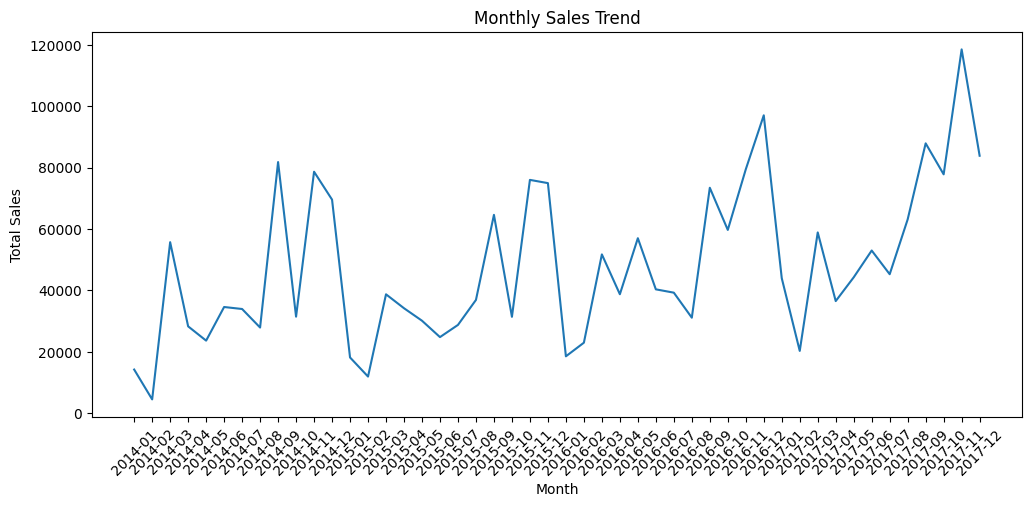

In [3]:
# Trend Analysis: Sales Over Time.

monthly_sales = (
    df.groupby("Order_Month")["Sales"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(12,5))
plt.plot(monthly_sales["Order_Month"], monthly_sales["Sales"])
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


Sales exhibit a generally upward trend with noticeable seasonal fluctuations, suggesting periods of demand concentration likely driven by promotions or holidays.

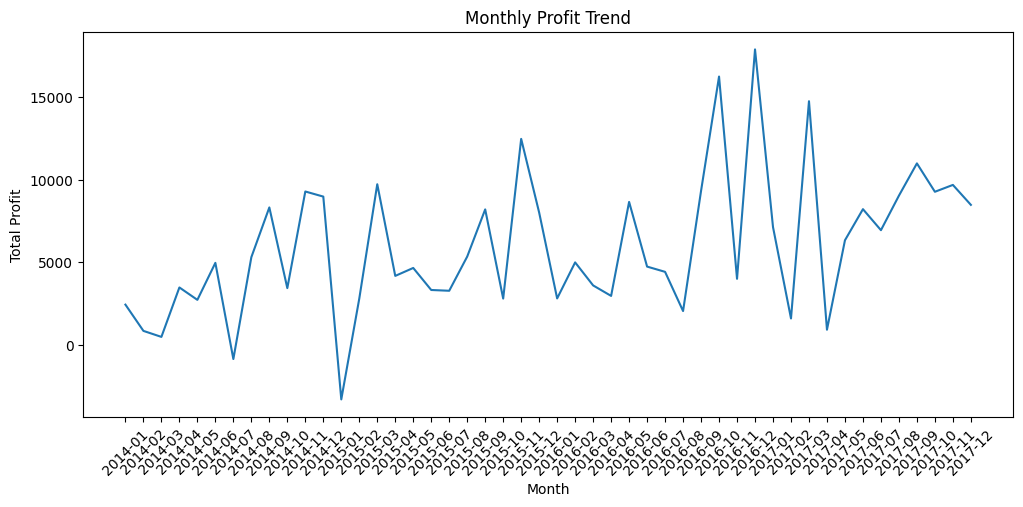

In [4]:
# Trend Analysis: Profit Over Time.

monthly_profit = (
    df.groupby("Order_Month")["Profit"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(12,5))
plt.plot(monthly_profit["Order_Month"], monthly_profit["Profit"])
plt.xticks(rotation=45)
plt.title("Monthly Profit Trend")
plt.xlabel("Month")
plt.ylabel("Total Profit")
plt.show()


Profit trends are more volatile than sales, indicating that revenue growth does not always translate into profitability.

In [ ]:
# Trend Modeling: Selecting only interpretable features.

model_df = df[["Sales", "Quantity", "Discount", "Profit"]]



X = model_df.drop("Profit", axis=1)
y = model_df["Profit"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [6]:
# Linear Regression Model.

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [7]:
# Model Evaluation.

print("R² Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))


R² Score: -0.7240890405096132
Mean Absolute Error: 69.77214730362897


The model provides a baseline understanding of profit drivers.

Performance metrics are used for interpretation, not operational deployment.


In [8]:
# Model interpretation.

coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

coefficients


,Feature,Coefficient
0,Sales,0.259335
1,Quantity,-6.512035
2,Discount,-208.858709


Sales positively influence profit, while discounts show a strong negative impact.

This aligns with earlier exploratory findings and reinforces discount sensitivity.
